# Saint Brieuc: grande pêche et cabotage au milieu du 19e siècle

Données issues de :

Martine Cocaud et Jacques Cellier, _« Grande pèche et cabotage dans le quartier de Saint-Brieuc au milieu du XIXe siècle. Méthodes et outils pour l’analyse des circuits commerciaux à partir des rôles de désarmement »_, in: Des galères méditerranéennes aux rivages normands, 2011, pp. 283‑302. Cf. [cette base de données](http://jacquescellier.fr/histoire/bdhistoire/cabot/) et ces [explications](http://jacquescellier.fr/histoire/bdhistoire/cabot/cabotages.pdf).

Le fichier 'data/cabotage.sqlite' contient une extraction des données de la base en ligne.


et de :

Auffray Jean-Michel, « Entre grande pêche et commerce », Annales de Bretagne et des Pays de l’Ouest. Anjou. Maine. Poitou-Charente. Touraine 117 (4), 2010, pp. 165‑194. En ligne: <https://doi.org/10.4000/abpo.1846>.




Voir aussi:

Conan Joseph, _Lettres d’un capitaine terre-neuvas_, Rennes, Presses universitaires de Rennes, 2013 (Mémoire commune). En ligne: <http://books.openedition.org/pur/43904>, consulté le 10.12.2021.





In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sqlite3 as sql

In [26]:
import sys

### Création de la fonction

In [122]:
def table_chi2 (pivot_table,figsize) :
    tx = pivot_table.loc[:,["Total"]]
    ty = pivot_table.loc[["Total"],:]
    n = pivot_table.iat[-1,-1]   # .iloc[:-1,:-1] 

    ### Compute the matrix multiplication between the columns.
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dot.html
    indep = tx.dot(ty) / n
    ecarts = (pivot_table-indep)
    # print(ecarts)
    ecarts_ponderes = ((pivot_table-indep)**2/indep).iloc[:-1,:-1]
    xi_n = ecarts_ponderes.sum().sum() 
    print(xi_n)

    table = ecarts_ponderes/xi_n
    fig, ax = plt.subplots(figsize=figsize)         
    # Sample figsize in inches
    g = sns.heatmap(ecarts_ponderes, annot=ecarts_ponderes, cmap="coolwarm", linewidths=.5, ax=ax)
    labels = ecarts_ponderes.index
    p = g.set_yticklabels(labels, rotation=10)

## Guerre de Crimée (1853/1854 – 1856)

*  https://fr.wikipedia.org/wiki/Guerre_de_Crimée

In [71]:
#  données tirées du graphique Auffray 2010, p. 179
file1 = 'data/auffray_2010_donnees_export.csv'

In [72]:
data1 = pd.read_csv(file1, sep='|')
data1.head()

,annee,saint_malo_terneuv,saint_brieuc_binic_terneuv,saint_brieuc_terneuv,binic_terneuv,saint_brieuc_commerce
0,1848,61.0,69.0,30.0,39.0,4.0
1,1849,61.0,70.0,31.0,39.0,4.0
2,1850,68.0,72.0,35.0,37.0,1.0
3,1851,72.0,71.0,32.0,39.0,3.0
4,1852,91.0,75.0,41.0,34.0,0.0


In [73]:
df = data1[data1['annee'].between(1848,1858, inclusive='both')]
df

,annee,saint_malo_terneuv,saint_brieuc_binic_terneuv,saint_brieuc_terneuv,binic_terneuv,saint_brieuc_commerce
0,1848,61.0,69.0,30.0,39.0,4.0
1,1849,61.0,70.0,31.0,39.0,4.0
2,1850,68.0,72.0,35.0,37.0,1.0
3,1851,72.0,71.0,32.0,39.0,3.0
4,1852,91.0,75.0,41.0,34.0,0.0
5,1853,85.0,71.0,37.0,34.0,5.0
6,1854,66.0,58.0,29.0,29.0,10.0
7,1855,65.0,51.0,26.0,25.0,10.0
8,1856,61.0,55.0,27.0,28.0,7.0
9,1857,70.0,69.0,32.0,37.0,3.0


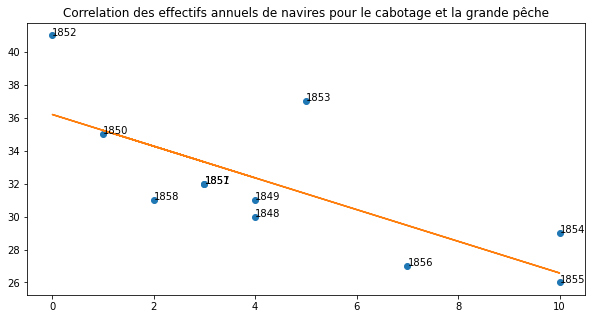

In [75]:
##
# https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python

x = np.array(df['saint_brieuc_commerce'])
y = np.array(df['saint_brieuc_terneuv'])

plt.rcParams["figure.figsize"] = [10, 5]

plt.plot(x, y, 'o')
plt.title("Correlation des effectifs annuels de navires pour le cabotage et la grande pêche")


# m = slope, b=intercept
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)

for i, label in enumerate(df['annee']):
    plt.annotate(label, (x[i], y[i]))
plt.show()

In [78]:
### Coéfficient de corrélation de Pearsons
# https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html
np.corrcoef([x,y])[1][0]

-0.7328149491028327

[]

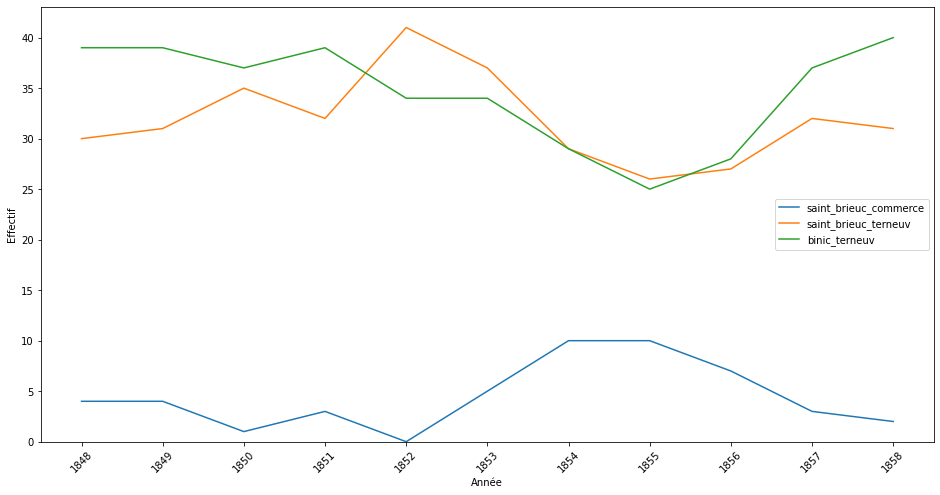

In [79]:
#  données tirées du graphique Auffray 2010, p. 179

fig,ax = plt.subplots(figsize=(16,8))


for name in ['saint_brieuc_commerce','saint_brieuc_terneuv','binic_terneuv']:
    ax.plot(df[name],label=name)

idx = np.asarray([i for i in range(len(df['annee']))])
ax.set_xticks(idx)
ax.set_xticklabels(df['annee'], rotation=45)


ax.set_xlabel("Année")
ax.set_ylabel("Effectif")
ax.legend(loc='best')
ax.set_ylim(ymin=0)

plt.plot()

## Saint Brieuc : grande pêche et cabotage

In [98]:
db_path = 'data/cabotage.sqlite'
cn = sql.connect(db_path)

In [99]:
query = "SELECT * FROM v_etapes_trajets"

In [100]:
etapes = pd.read_sql_query(query,cn)

In [101]:
print(len(etapes))
etapes[:2], etapes[-2:]

1470


(  sSTATUT      depart reg_depart     arrivee reg_arrivee  aANNEE aACTIVITE  \
 0      C   ST BRIEUC     BRNORD   ST BRIEUC      BRNORD     1848        C    
 1      C   ST BRIEUC     BRNORD   ST BRIEUC      BRNORD     1848        C    
 
    nFRET fNATURE aNOMBATEAU    aARMEMENT  eff_etapes          frets  nNUMETAP  \
 0  LEST    LEST     ALCYON   VILLEFÉRON            2  LEST ,LEST ,          1   
 1  LEST    LEST     ALCYON   VILLEFÉRON            2  LEST ,LEST ,          2   
 
       nDEPART    nARRIVEE  
 0  ST BRIEUC   PORTRIEUX   
 1  PORTRIEUX   ST BRIEUC   ,
      sSTATUT  depart reg_depart     arrivee reg_arrivee  aANNEE aACTIVITE  \
 1468     TN   GENES     ITALIE   ST BRIEUC      BRNORD     1858       TN    
 1469     TN   GENES     ITALIE   ST BRIEUC      BRNORD     1858       TN    
 
       nFRET fNATURE aNOMBATEAU aARMEMENT  eff_etapes    frets  nNUMETAP  \
 1468  LEST    LEST   ST LOUIS    BOULLÉ            1  LEST ,          1   
 1469   SEL     SEL    ST PAUL    ROU

In [81]:
query = "SELECT * FROM activitesbateaux"

In [82]:
activites = pd.read_sql_query(query,cn)

In [83]:
print(len(activites))
activites[:2], activites[-2:]

447


(   pk_activitesbateaux aNOMBATEAU  aANNEE aARMEMENT aACTIVITE
 0                    1    ALCIDE     1848   BOULLÉ        TN 
 1                    2    ALCIDE     1849   BOULLÉ        TN ,
      pk_activitesbateaux  aNOMBATEAU  aANNEE    aARMEMENT aACTIVITE
 445                  446      UTILE     1857  VILLEFERON        TN 
 446                  447  VICTORINE     1849      JOUBIN         C )

In [84]:
cn.close()

In [85]:
etapes.columns

Index(['sSTATUT', 'depart', 'reg_depart', 'arrivee', 'reg_arrivee', 'aANNEE',
       'aACTIVITE', 'aNOMBATEAU', 'aARMEMENT', 'eff_etapes', 'frets',
       'nNUMETAP', 'nDEPART', 'nARRIVEE', 'nFRET', 'trois_ans', 'deux_ans'],
      dtype='object')

In [86]:
activites.columns

Index(['pk_activitesbateaux', 'aNOMBATEAU', 'aANNEE', 'aARMEMENT',
       'aACTIVITE'],
      dtype='object')

In [88]:
deux_ans = [x for x in range(1848,1861, 2)]
deux_ans

[1848, 1850, 1852, 1854, 1856, 1858, 1860]

## Évolution des voyages par catégorie

In [89]:
## fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html


activites['deux_ans'] = pd.cut(activites['aANNEE'], deux_ans, right=False)
### Transformer le code ajouté pour qu'il soit plus lisible
# etapes['deux_ans'] = etapes['deux_ans'].apply(lambda row : str(int(row.left))+'-'+str(int(row.right)))

## Inspection
activites

,pk_activitesbateaux,aNOMBATEAU,aANNEE,aARMEMENT,aACTIVITE,deux_ans
0,1,ALCIDE,1848,BOULLÉ,TN,"[1848, 1850)"
1,2,ALCIDE,1849,BOULLÉ,TN,"[1848, 1850)"
2,3,ALCIDE,1850,BOULLÉ,TN,"[1850, 1852)"
3,4,ALCIDE,1851,BOULLÉ,TN,"[1850, 1852)"
4,5,ALCIDE,1852,BOULLÉ,TN,"[1852, 1854)"
...,...,...,...,...,...,...
442,443,UTILE,1854,VILLEFERON,TN,"[1854, 1856)"
443,444,UTILE,1855,VILLEFERON,TN,"[1854, 1856)"
444,445,UTILE,1856,VILLEFERON,TN,"[1856, 1858)"
445,446,UTILE,1857,VILLEFERON,TN,"[1856, 1858)"


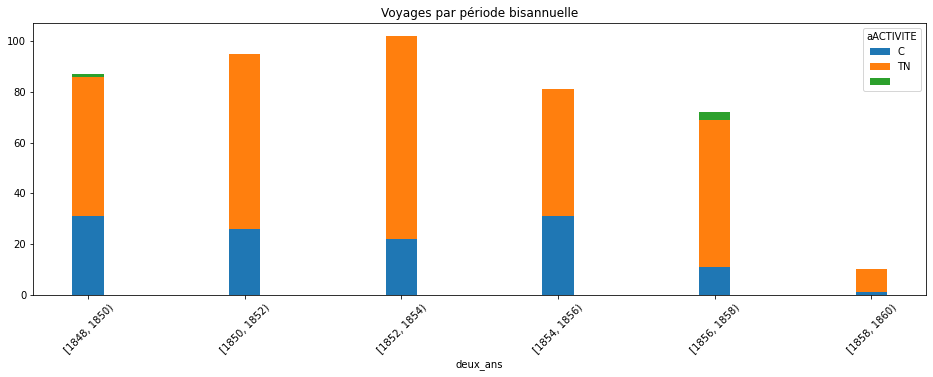

In [92]:
X = 'aACTIVITE'
Y = 'deux_ans'

g = activites[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len) \
        .fillna(0).astype(int).sort_values(by=Y, ascending=True) \
        .plot( kind='bar', stacked=True,  width=0.2,  figsize=(16,5),  title = "Voyages par période bisannuelle")
plt.xticks(rotation=45)
plt.show()

## Effectif étapes par période bisannuelle

In [120]:
## fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html


etapes['deux_ans'] = pd.cut(etapes['aANNEE'], deux_ans, right=False)
### Transformer le code ajouté pour qu'il soit plus lisible
etapes['deux_ans_str'] = etapes['deux_ans'].apply(lambda row : str(int(row.left))+'-'+str(int(row.right)))

## Inspection
etapes

,sSTATUT,depart,reg_depart,arrivee,reg_arrivee,aANNEE,aACTIVITE,nFRET,fNATURE,aNOMBATEAU,aARMEMENT,eff_etapes,frets,nNUMETAP,nDEPART,nARRIVEE,deux_ans,deux_ans_str
0,C,ST BRIEUC,BRNORD,ST BRIEUC,BRNORD,1848,C,LEST,LEST,ALCYON,VILLEFÉRON,2,"LEST ,LEST ,",1,ST BRIEUC,PORTRIEUX,"[1848, 1850)",1848-1850
1,C,ST BRIEUC,BRNORD,ST BRIEUC,BRNORD,1848,C,LEST,LEST,ALCYON,VILLEFÉRON,2,"LEST ,LEST ,",2,PORTRIEUX,ST BRIEUC,"[1848, 1850)",1848-1850
2,C,MARSEILLE,FRMED,ST BRIEUC,BRNORD,1848,C,DM,DM,ANGÉLIQUE,SÉBERT,12,"DM ,LEST ,SEL ,GRANIT ,DM ,DM ,DM ,LEST ,FROME...",1,MARSEILLE,ST BRIEUC,"[1848, 1850)",1848-1850
3,C,MARSEILLE,FRMED,ST BRIEUC,BRNORD,1848,C,DM,DM,ANGÉLIQUE,SÉBERT,12,"DM ,LEST ,SEL ,GRANIT ,DM ,DM ,DM ,LEST ,FROME...",2,ST BRIEUC,RE,"[1848, 1850)",1848-1850
4,C,MARSEILLE,FRMED,ST BRIEUC,BRNORD,1848,C,DM,DM,ANGÉLIQUE,SÉBERT,12,"DM ,LEST ,SEL ,GRANIT ,DM ,DM ,DM ,LEST ,FROME...",3,RE,ST BRIEUC,"[1848, 1850)",1848-1850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,MIX,ST BRIEUC,BRNORD,ST BRIEUC,BRNORD,1858,TN,HUILE MORUE,DAL,ST BRIEUC,DE RAYS,3,"HUILE MORUE ,LEST ,SEL ,",1,ST BRIEUC,LA ROCHELLE,"[1858, 1860)",1858-1860
1466,MIX,ST BRIEUC,BRNORD,ST BRIEUC,BRNORD,1858,TN,HUILE MORUE,DAL,ST BRIEUC,DE RAYS,3,"HUILE MORUE ,LEST ,SEL ,",2,LA ROCHELLE,RE,"[1858, 1860)",1858-1860
1467,MIX,ST BRIEUC,BRNORD,ST BRIEUC,BRNORD,1858,TN,HUILE MORUE,DAL,ST BRIEUC,DE RAYS,3,"HUILE MORUE ,LEST ,SEL ,",3,RE,ST BRIEUC,"[1858, 1860)",1858-1860
1468,TN,GENES,ITALIE,ST BRIEUC,BRNORD,1858,TN,LEST,LEST,ST LOUIS,BOULLÉ,1,"LEST ,",1,GENES,ST BRIEUC,"[1858, 1860)",1858-1860


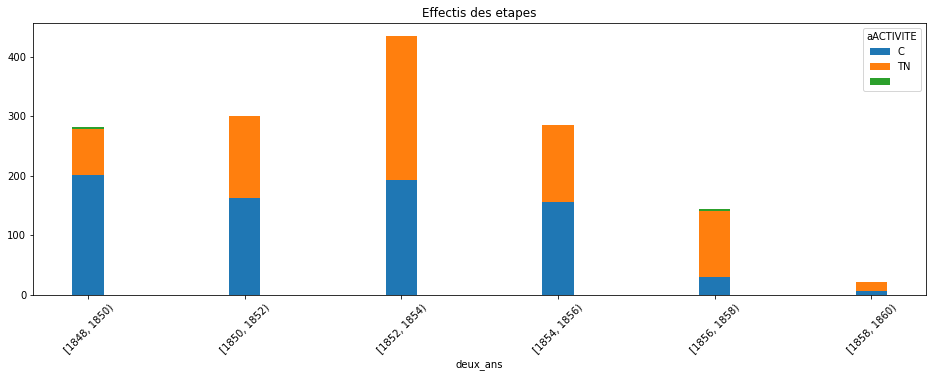

In [128]:
X = 'aACTIVITE'
Y = 'deux_ans'

g = etapes[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len) \
        .fillna(0).astype(int).sort_values(by=Y, ascending=True) \
        .plot( kind='bar', stacked=True,  width=0.2,  figsize=(16,5),  title = "Effectis des etapes")
plt.xticks(rotation=45)
plt.show()

In [129]:
etapes[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len) \
        .fillna(0).astype(int).sort_values(by=Y, ascending=True)

aACTIVITE,C,TN,
deux_ans,,,
"[1848, 1850)",201,77,4
"[1850, 1852)",162,139,0
"[1852, 1854)",193,242,0
"[1854, 1856)",156,130,0
"[1856, 1858)",30,110,4
"[1858, 1860)",7,15,0


## Effectifs de la typologie des frets par période bisannuelle

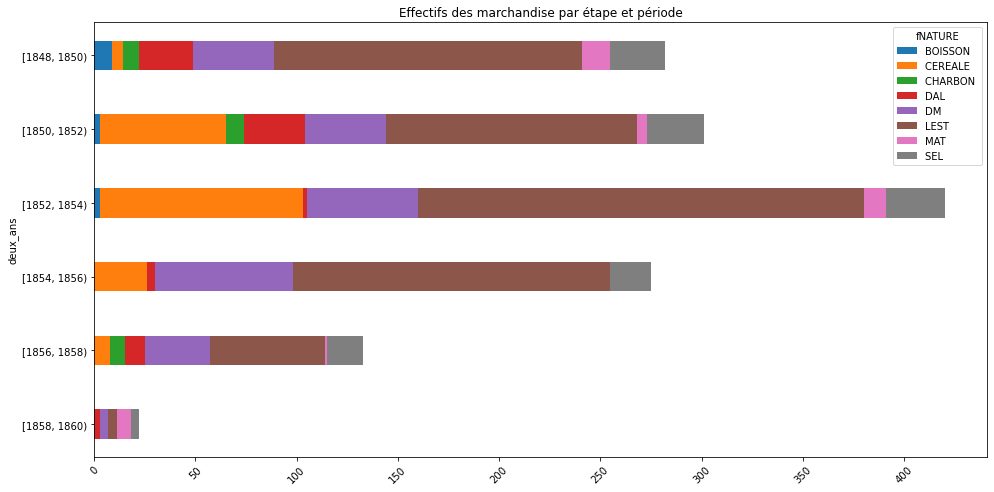

In [130]:
X = 'fNATURE'
Y = 'deux_ans'

g = etapes[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len) \
        .fillna(0).astype(int).sort_values(by=Y, ascending=False) \
        .plot( kind='barh', stacked=True,  width=0.4,  figsize=(16,8),  title = "Effectifs des marchandise par étape et période")
plt.xticks(rotation=45)
plt.show()

In [131]:
X = 'fNATURE'
Y = 'deux_ans_str'

pt = etapes[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len, \
        margins=True,margins_name="Total") \
        .fillna(0).astype(int).sort_values(by=Y, ascending=True)
pt

fNATURE,BOISSON,CEREALE,CHARBON,DAL,DM,LEST,MAT,SEL,Total
deux_ans_str,,,,,,,,,
1848-1850,9,5,8,27,40,152,14,27,282
1850-1852,3,62,9,30,40,124,5,28,301
1852-1854,3,100,0,2,55,220,11,29,420
1854-1856,0,26,0,4,68,157,0,20,275
1856-1858,0,8,7,10,32,57,1,18,133
1858-1860,0,0,0,3,4,4,7,4,22
Total,15,201,24,76,239,714,38,126,1433


309.4624351551526


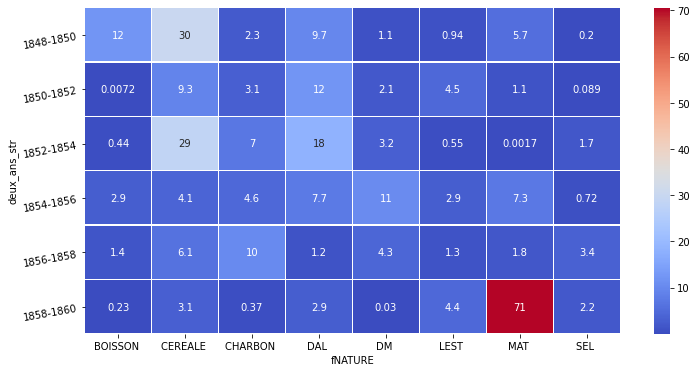

In [123]:
table_chi2(pt,(12,6))

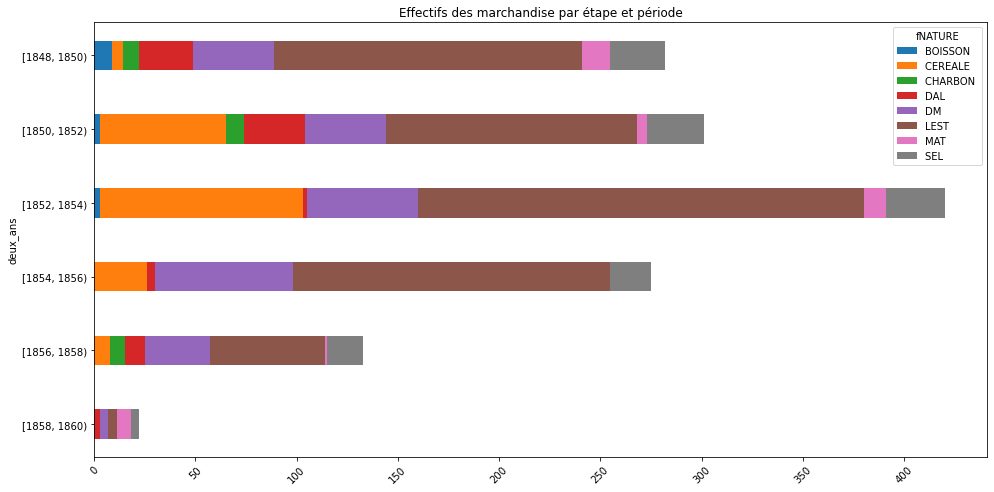

In [133]:


X = 'fNATURE'
Y = 'deux_ans'

g = etapes[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len) \
        .fillna(0).astype(int).sort_values(by=Y, ascending=False) \
        .plot( kind='barh', stacked=True,  width=0.4,  figsize=(16,8),  title = "Effectifs des marchandise par étape et période")
plt.xticks(rotation=45)
plt.show()

## Effectifs des régions de départ par période bisannuelle

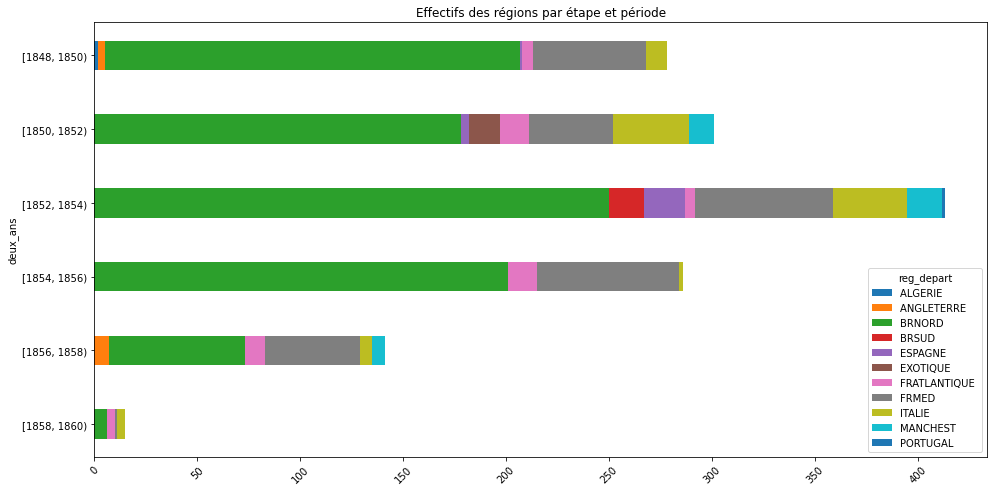

In [134]:
X = 'reg_depart'
Y = 'deux_ans'

g = etapes[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len) \
        .fillna(0).astype(int).sort_values(by=Y, ascending=False) \
        .plot( kind='barh', stacked=True,  width=0.4,  figsize=(16,8),  title = "Effectifs des régions par étape et période")
plt.xticks(rotation=45)
plt.show()

In [135]:
X = 'reg_depart'
Y = 'deux_ans_str'

pt = etapes[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len, \
        margins=True,margins_name="Total") \
        .fillna(0).astype(int).sort_values(by=Y, ascending=True)
pt

reg_depart,ALGERIE,ANGLETERRE,BRNORD,BRSUD,ESPAGNE,EXOTIQUE,FRATLANTIQUE,FRMED,ITALIE,MANCHEST,PORTUGAL,Total
deux_ans_str,,,,,,,,,,,,
1848-1850,2,3,202,0,1,0,5,55,10,0,0,278
1850-1852,0,0,178,0,4,15,14,41,37,12,0,301
1852-1854,0,0,250,17,20,0,5,67,36,17,1,413
1854-1856,0,0,201,0,0,0,14,69,2,0,0,286
1856-1858,0,7,66,0,0,0,10,46,6,6,0,141
1858-1860,0,0,6,0,0,0,4,1,4,0,0,15
Total,2,10,903,17,25,15,52,279,95,35,1,1434


335.1964562422401


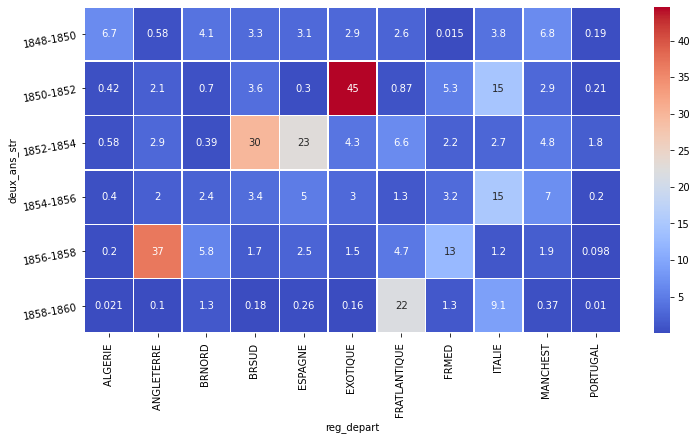

In [136]:
table_chi2(pt,(12,6))

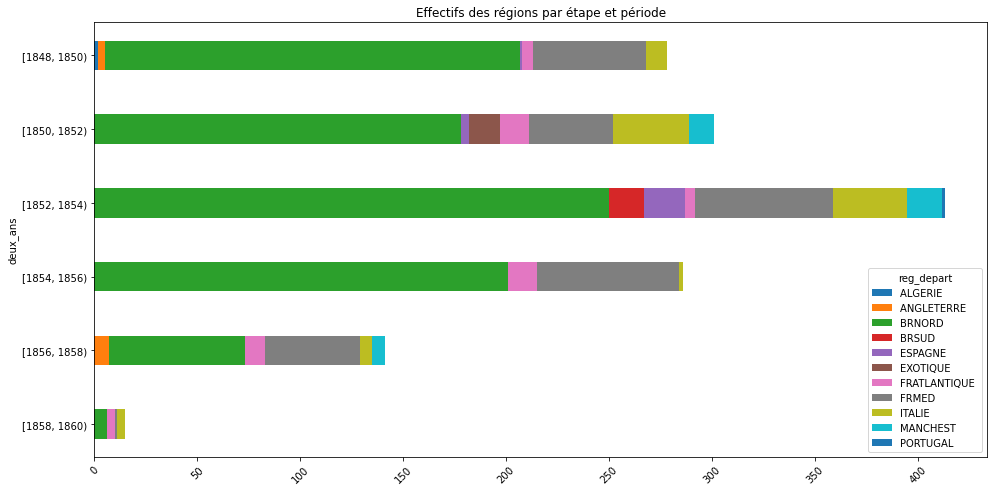

In [137]:
X = 'reg_depart'
Y = 'deux_ans'

g = etapes[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len) \
        .fillna(0).astype(int).sort_values(by=Y, ascending=False) \
        .plot( kind='barh', stacked=True,  width=0.4,  figsize=(16,8),  title = "Effectifs des régions par étape et période")
plt.xticks(rotation=45)
plt.show()